# [Deep Learning](https://github.com/M-Sc-AUT/M.Sc-Computer-Architecture/tree/main/Deep%20Learning) - Spring 2024
#### [Reza Adinepour](https://github.com/rezaAdinepour)
#### Stu.ID: 402131055

## Question 1 - Part 3:

In this part, we will apply some of NLP techniques on a dataset containing Wikipedia texts ($\texttt{WikipediaEvents.csv}$ file). The primary goal of this part is to demonstrate how various NLP techniques can be effectively utilized in data science to process and analyze textual data.

## Project Objectives

1. **Text Preprocessing:** Cleaning the text in the dataset for analysis, which includes converting text to lower case, removing punctuation, and eliminating numerical expressions.

2. **Stopwords Removal:** Enhancing feature extraction by omitting commonly occurring words that add little value to the text's meaning.

3. **Word Frequency Analysis:** Identifying the most prevalent terms by calculating word frequencies within the text.

4. **Data Visualization:** Using graphical tools like barplot graphs and WordCloud for a more illustrative presentation of the data.

### Install important libraries

In [1]:
!pip install nltk
!pip install twython
!pip install textblob
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Import libraries

In [2]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from wordcloud import WordCloud
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from minisom import MiniSom

### Adjusting row column settings

In [121]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Loading dataset

In [122]:
df = pd.read_csv("WikipediaEvents.csv", index_col=0)
print("shape of dataset: {}" .format(df.shape))
df.head()

shape of dataset: (473, 1)


,text
0,"January 1, 2022 – The Regional Comprehensive E..."
1,"January 2, 2022 – Abdalla Hamdok resigns as Pr..."
2,"January 4, 2022 – The five permanent members o..."
3,"January 5, 2022 – A nationwide state of emerge..."
4,"January 6, 2022 – The CSTO deploys a ""peacekee..."


## Text preprocessing

In [123]:
df["text"]

0      January 1, 2022 – The Regional Comprehensive E...
1      January 2, 2022 – Abdalla Hamdok resigns as Pr...
2      January 4, 2022 – The five permanent members o...
3      January 5, 2022 – A nationwide state of emerge...
4      January 6, 2022 – The CSTO deploys a "peacekee...
                             ...                        
468    October, 2024 – 2024 Georgian presidential ele...
469     November, 2024 – 2024 Namibian general election.
470    November, 2024 – 2024 Romanian presidential el...
471    November, 2024 – Lee Hsien Loong, Prime Minist...
472    December, 2024 – 2024 Croatian presidential el...
Name: text, Length: 473, dtype: object

### 1. Lowercases, Punctuation, Numbers and Newline Characters

In [124]:
def clean_text(text):
    """
    Clean and preprocess text data.

    This function performs several cleaning operations on text data:
    - Lowercases the text (Case Folding)
    - Removes punctuation
    - Removes numbers
    - Removes newline characters

    Parameters:
    text (pandas.Series): A pandas Series containing text data.

    Returns:
    pandas.Series: A pandas Series with cleaned text.
    """
    # Lowercasing (Case Folding)
    text = text.str.lower()
    # Removing punctuations, numbers, and newline characters
    text = text.str.replace(r'[^\w\s]', '', regex=True)
    text = text.str.replace("\n", '', regex=True)
    text = text.str.replace('\d', '', regex=True)
    return text

In [125]:
df["text"] = clean_text(df["text"])
df["text"]

0      january    the regional comprehensive economic...
1      january    abdalla hamdok resigns as prime min...
2      january    the five permanent members of the u...
3      january    a nationwide state of emergency is ...
4      january    the csto deploys a peacekeeping mis...
                             ...                        
468            october    georgian presidential election
469                november    namibian general election
470           november    romanian presidential election
471    november   lee hsien loong prime minister of s...
472           december    croatian presidential election
Name: text, Length: 473, dtype: object

### 2. Stopwords Removal

In [126]:
nltk.download("stopwords")
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to /home/reza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
def remove_stopwords(text):
    """
    Remove stopwords from text data.

    This function filters out common stopwords from the text data. 
    Stopwords are removed based on the NLTK's English stopwords list.

    Parameters:
    text (pandas.Series): A pandas Series containing text data.

    Returns:
    pandas.Series: A pandas Series with stopwords removed from the text.
    """
    text = text.apply(lambda x: " ".join(word for word in str(x).split() if word not in stop_words))
    return text

In [128]:
df["text"] = remove_stopwords(df["text"])
df["text"]

0      january regional comprehensive economic partne...
1      january abdalla hamdok resigns prime minister ...
2      january five permanent members un security cou...
3      january nationwide state emergency declared ka...
4      january csto deploys peacekeeping mission kaza...
                             ...                        
468               october georgian presidential election
469                   november namibian general election
470              november romanian presidential election
471    november lee hsien loong prime minister singap...
472              december croatian presidential election
Name: text, Length: 473, dtype: object

### 3. Rare Words and Frequent Words

In [129]:
def remove_rare_words(df, column_name, n_rare_words=1000):
    """
    Remove rare words from a specified column in a pandas DataFrame.

    This function identifies and removes the least frequently occurring words
    in the text data. It is useful for removing rare words that might not contribute
    significantly to the analysis or modeling.

    Parameters:
    df (pandas.DataFrame): A pandas DataFrame containing the text data.
    column_name (str): The name of the column in the DataFrame to clean.
    n_rare_words (int): The number of least frequent words to remove.

    Returns:
    pandas.DataFrame: A DataFrame with rare words removed from the specified column.
    """
    # Identifying the rare words
    freq = pd.Series(' '.join(df[column_name]).split()).value_counts()
    rare_words = freq[-n_rare_words:]

    # Removing the rare words
    df[column_name] = df[column_name].apply(lambda x: " ".join(word for word in x.split() if word not in rare_words))
    return df

In [130]:
df = remove_rare_words(df, 'text', 1000)
df["text"]

0      january regional comprehensive economic larges...
1      january resigns prime minister sudan amid dead...
2      january five permanent members un security fra...
3      january nationwide state emergency declared ka...
4      january deploys peacekeeping mission kazakhsta...
                             ...                        
468               october georgian presidential election
469                   november namibian general election
470              november romanian presidential election
471    november lee hsien loong prime minister singap...
472              december croatian presidential election
Name: text, Length: 473, dtype: object

### 4. Tokenization

In [131]:
nltk.download('punkt')
df["text"].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /home/reza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0      [january, regional, comprehensive, economic, l...
1      [january, resigns, prime, minister, sudan, ami...
2      [january, five, permanent, members, un, securi...
3      [january, nationwide, state, emergency, declar...
4      [january, deploys, peacekeeping, mission, kaza...
                             ...                        
468          [october, georgian, presidential, election]
469              [november, namibian, general, election]
470         [november, romanian, presidential, election]
471    [november, lee, hsien, loong, prime, minister,...
472         [december, croatian, presidential, election]
Name: text, Length: 473, dtype: object

### 5. Lemmatization

In [132]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/reza/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/reza/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [133]:
def apply_lemmatization(df, column_name):
    """
    Apply lemmatization to a specified column in a pandas DataFrame.

    This function performs lemmatization on the text data in the specified column.
    Lemmatization involves reducing each word to its base or root form.

    Parameters:
    df (pandas.DataFrame): A pandas DataFrame containing the text data.
    column_name (str): The name of the column in the DataFrame to process.

    Returns:
    pandas.DataFrame: A DataFrame with lemmatized text in the specified column.
    """
    # Applying lemmatization
    df[column_name] = df[column_name].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

    return df

In [134]:
df = apply_lemmatization(df, 'text')
df['text']

0      january regional comprehensive economic larges...
1      january resigns prime minister sudan amid dead...
2      january five permanent member un security fran...
3      january nationwide state emergency declared ka...
4      january deploys peacekeeping mission kazakhsta...
                             ...                        
468               october georgian presidential election
469                   november namibian general election
470              november romanian presidential election
471    november lee hsien loong prime minister singap...
472              december croatian presidential election
Name: text, Length: 473, dtype: object

### 6. Calculation of Term Frequencies & Barplot & Word Cloud

In [135]:
def plot_tf_and_wordcloud(df, column_name, tf_threshold=2000, max_font_size=50, max_words=100, background_color="black"):
    """
    Calculate term frequency (TF) and generate a word cloud for a specified column in a pandas DataFrame.

    This function performs two main tasks:
    1. Term Frequency Calculation and Bar Chart: Calculates the frequency of each word in the specified column and plots a bar chart for words with a frequency above a certain threshold.
    2. Word Cloud Generation: Generates and displays a word cloud based on the text in the specified column.

    Parameters:
    df (pandas.DataFrame): A pandas DataFrame containing the text data.
    column_name (str): The name of the column to analyze.
    tf_threshold (int): The threshold for term frequency to be included in the bar chart.
    max_font_size (int): Maximum font size for the word cloud.
    max_words (int): The maximum number of words for the word cloud.
    background_color (str): Background color for the word cloud.

    Returns:
    None: This function only plots the results and does not return any value.
    """
    # 1. Term Frequency Calculation and Bar Chart
    tf = df[column_name].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
    tf.columns = ["words", "tf"]
    high_tf = tf[tf["tf"] > tf_threshold]
    high_tf.plot.bar(x="words", y="tf", title="Term Frequency Bar Chart")
    plt.show()

    # 2. Word Cloud Generation
    text = " ".join(i for i in df[column_name])
    wordcloud = WordCloud(max_font_size=max_font_size, max_words=max_words, background_color=background_color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("Word Cloud")
    plt.axis("off")
    plt.show()

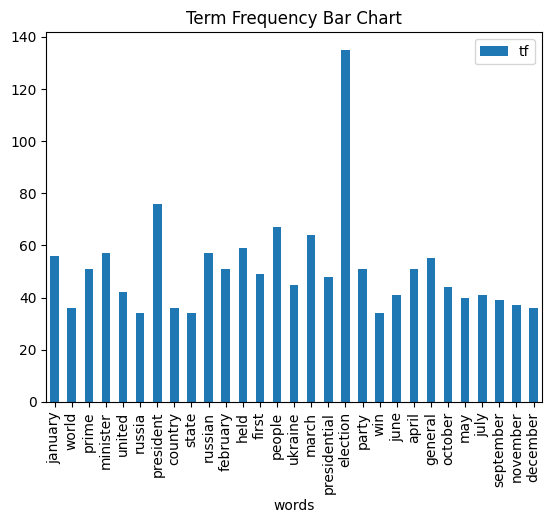

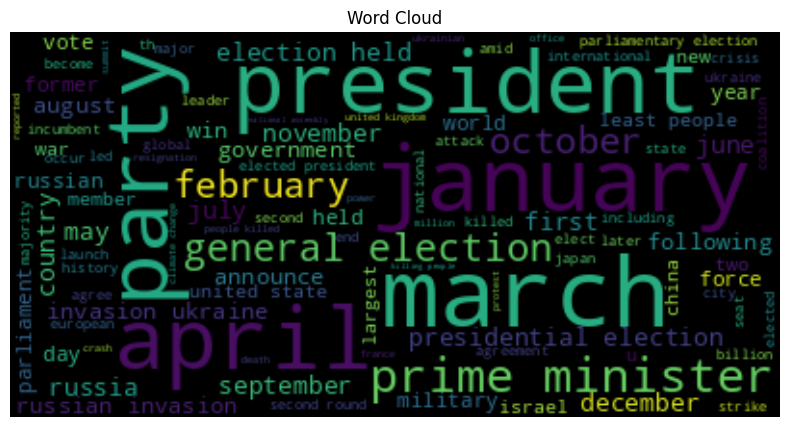

In [136]:
plot_tf_and_wordcloud(df, "text", tf_threshold=30)

In [137]:
df['text']
# save pretrained dataset
df.to_csv('preprocessed_data.csv', index=False)

### 7. Word to vector embeddings using GloVe pretrained model

In [138]:
# load glove pretrained model
glove_input_file = "/mnt/9636D17436D15639/University/CE/Deep Learning/Dr Safabakhsh/Spring 2024/Dataset/glove.6B.100d.txt"
word2vec_output_file = "/mnt/9636D17436D15639/University/CE/Deep Learning/Dr Safabakhsh/Spring 2024/Dataset/glove.word2vec.txt"
glove2word2vec(glove_input_file, word2vec_output_file)

glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [139]:
def convert_to_vector(text):
    """
    Convert words to vectors using a pre-trained GloVe model.

    This function converts each word in the text to its corresponding vector representation
    using a pre-trained GloVe model. If a word is not in the model's vocabulary, it is ignored.

    Parameters:
    text (str): The text to convert.

    Returns:
    list: A list of vectors representing the words in the text.
    """
    return [glove_model[word] for word in text.split() if word in glove_model]

In [140]:
df["vectors"] = df['text'].apply(convert_to_vector)
df.to_csv("word2vec_out.csv", index=False)
df["vectors"]

0      [[0.39596, -0.73958, -0.33831, -0.10208, 0.354...
1      [[0.39596, -0.73958, -0.33831, -0.10208, 0.354...
2      [[0.39596, -0.73958, -0.33831, -0.10208, 0.354...
3      [[0.39596, -0.73958, -0.33831, -0.10208, 0.354...
4      [[0.39596, -0.73958, -0.33831, -0.10208, 0.354...
                             ...                        
468    [[0.41278, -0.76503, -0.28583, -0.04694, 0.315...
469    [[0.27465, -0.67486, -0.21946, -0.13671, 0.456...
470    [[0.27465, -0.67486, -0.21946, -0.13671, 0.456...
471    [[0.27465, -0.67486, -0.21946, -0.13671, 0.456...
472    [[0.48232, -0.76519, -0.30619, -0.027161, 0.25...
Name: vectors, Length: 473, dtype: object

In [142]:
data = df.values
print(data.shape)
# data

(473, 2)


### Visualize vector representation

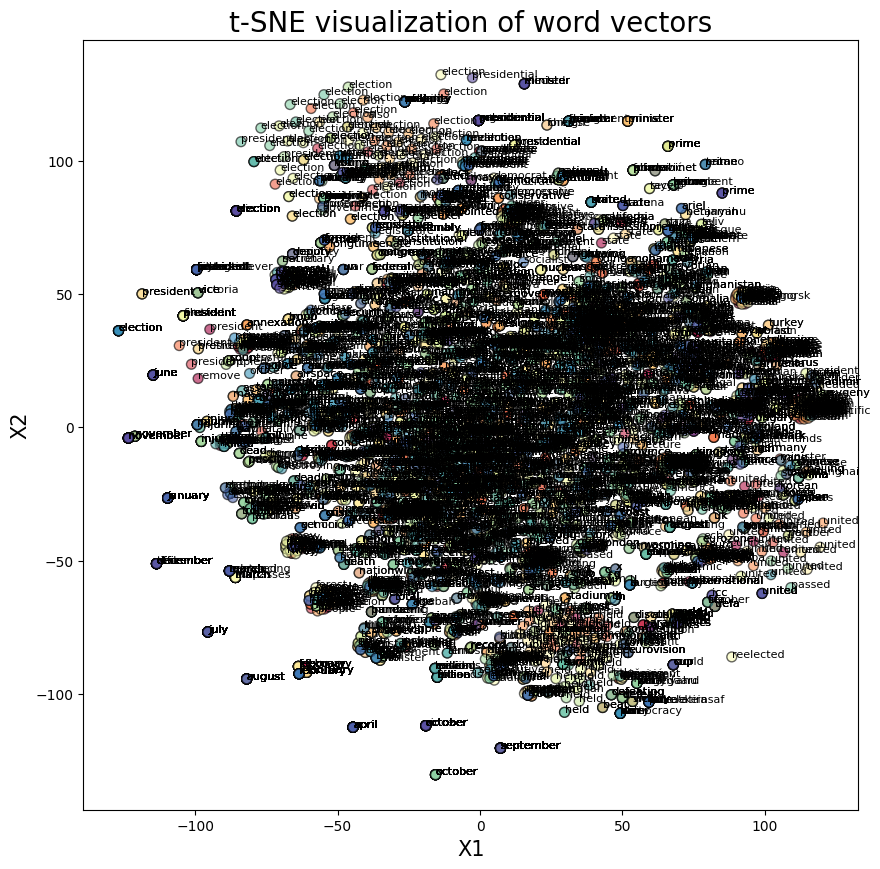

In [143]:
# extract the word vectors and their corresponding words
words = []
vectors = []
for _, row in df.iterrows():
    for word, vector in zip(row["text"].split(), row["vectors"]):
        words.append(word)
        vectors.append(vector)

# use t-SNE to reduce the dimension of the vectors to 2D
vectors = np.array(vectors)
tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(vectors)

# vrctors_2d = vectors.reshape(-1, 2)

plt.figure(figsize=(10, 10))
cmap = plt.get_cmap("Spectral")
colors = cmap(np.linspace(0, 1, len(vectors_2d)))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], edgecolors='k', c=colors, alpha=0.6, s=50)

for word, (x, y) in zip(words, vectors_2d):
    plt.text(x, y, word, fontsize=8)

plt.title("t-SNE visualization of word vectors", fontsize=20)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X2", fontsize=15)

plt.show()

In [202]:
print(vectors.shape)
# print(vectors)

print(vectors_2d.shape)
# print(vectors_2d)

vectors = vectors.reshape(-1, 2)
print(vectors.shape)
# print(vectors)


(327600, 2)
(6552, 2)
(327600, 2)


### plot random sets

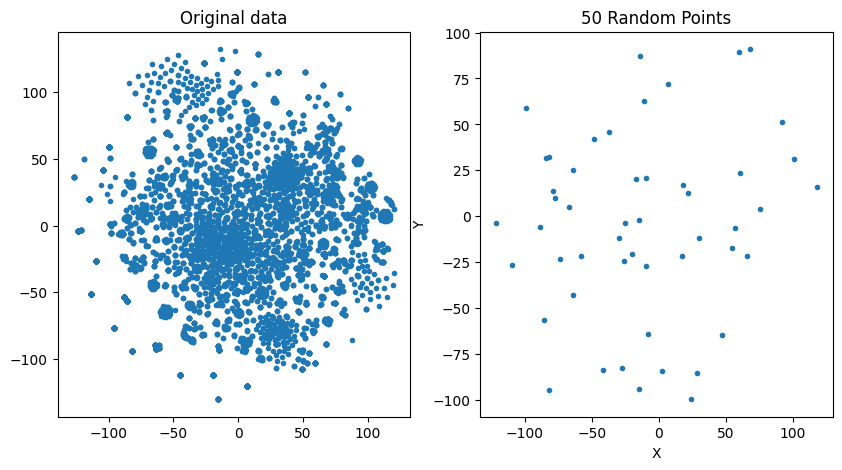

In [145]:
random_sample_size = 50

random_indices = np.random.choice(vectors_2d.shape[0], size=random_sample_size, replace=False)
random_points = vectors_2d[random_indices]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='.')
plt.title("Original data")

plt.subplot(1, 2, 2)
plt.scatter(random_points[:, 0], random_points[:, 1], marker='.')
plt.title("{} Random Points" .format(random_sample_size))
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Define and Train SOM network

In [146]:
"""
def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5,
                 decay_function=asymptotic_decay,
                 neighborhood_function='gaussian', topology='rectangular',
                 activation_distance='euclidean', random_seed=None):

Parameters
        ----------
        x : int
            x dimension of the SOM.

        y : int
            y dimension of the SOM.

        input_len : int
            Number of the elements of the vectors in input.

"""


# Initialization and training
som_shape = (1, 5)
som = MiniSom(som_shape[0], som_shape[1], vectors_2d.shape[1], sigma=.5, learning_rate=.5,
            neighborhood_function='gaussian', random_seed=10)

som.train_batch(vectors_2d, 50000, verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 37.94900830809914


### Plot clusters on all data

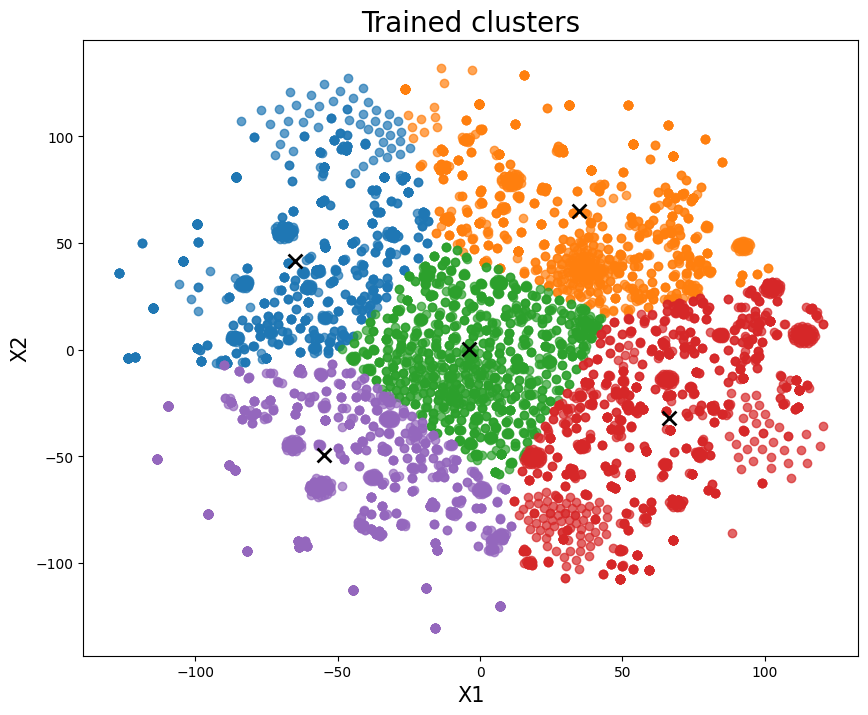

In [147]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in vectors_2d]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)


plt.figure(figsize=(10, 8))
for c in np.unique(cluster_index):
    plt.scatter(vectors_2d[cluster_index == c, 0],
                vectors_2d[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
    plt.title("Trained clusters", fontsize=20)
    plt.xlabel("X1", fontsize=15)
    plt.ylabel("X2", fontsize=15)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=100, linewidths=2, color='k', label='centroid')

### Plot clusters on 50 random data

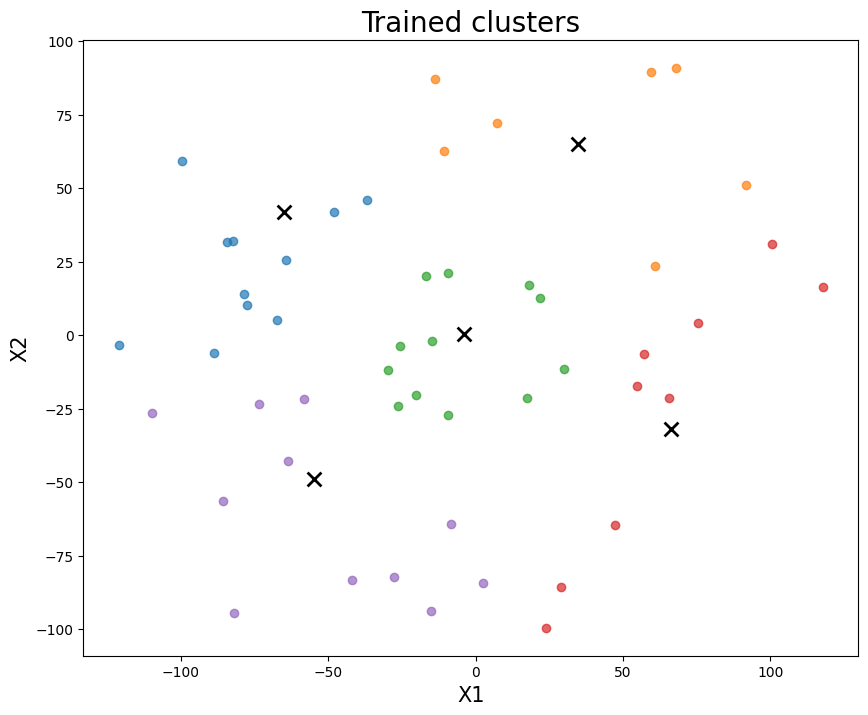

In [148]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in random_points]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)


plt.figure(figsize=(10, 8))
for c in np.unique(cluster_index):
    plt.scatter(random_points[cluster_index == c, 0],
                random_points[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
    plt.title("Trained clusters", fontsize=20)
    plt.xlabel("X1", fontsize=15)
    plt.ylabel("X2", fontsize=15)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=100, linewidths=2, color='k', label='centroid')

(50, 2)
679
679
(679, 100)
(679, 2)


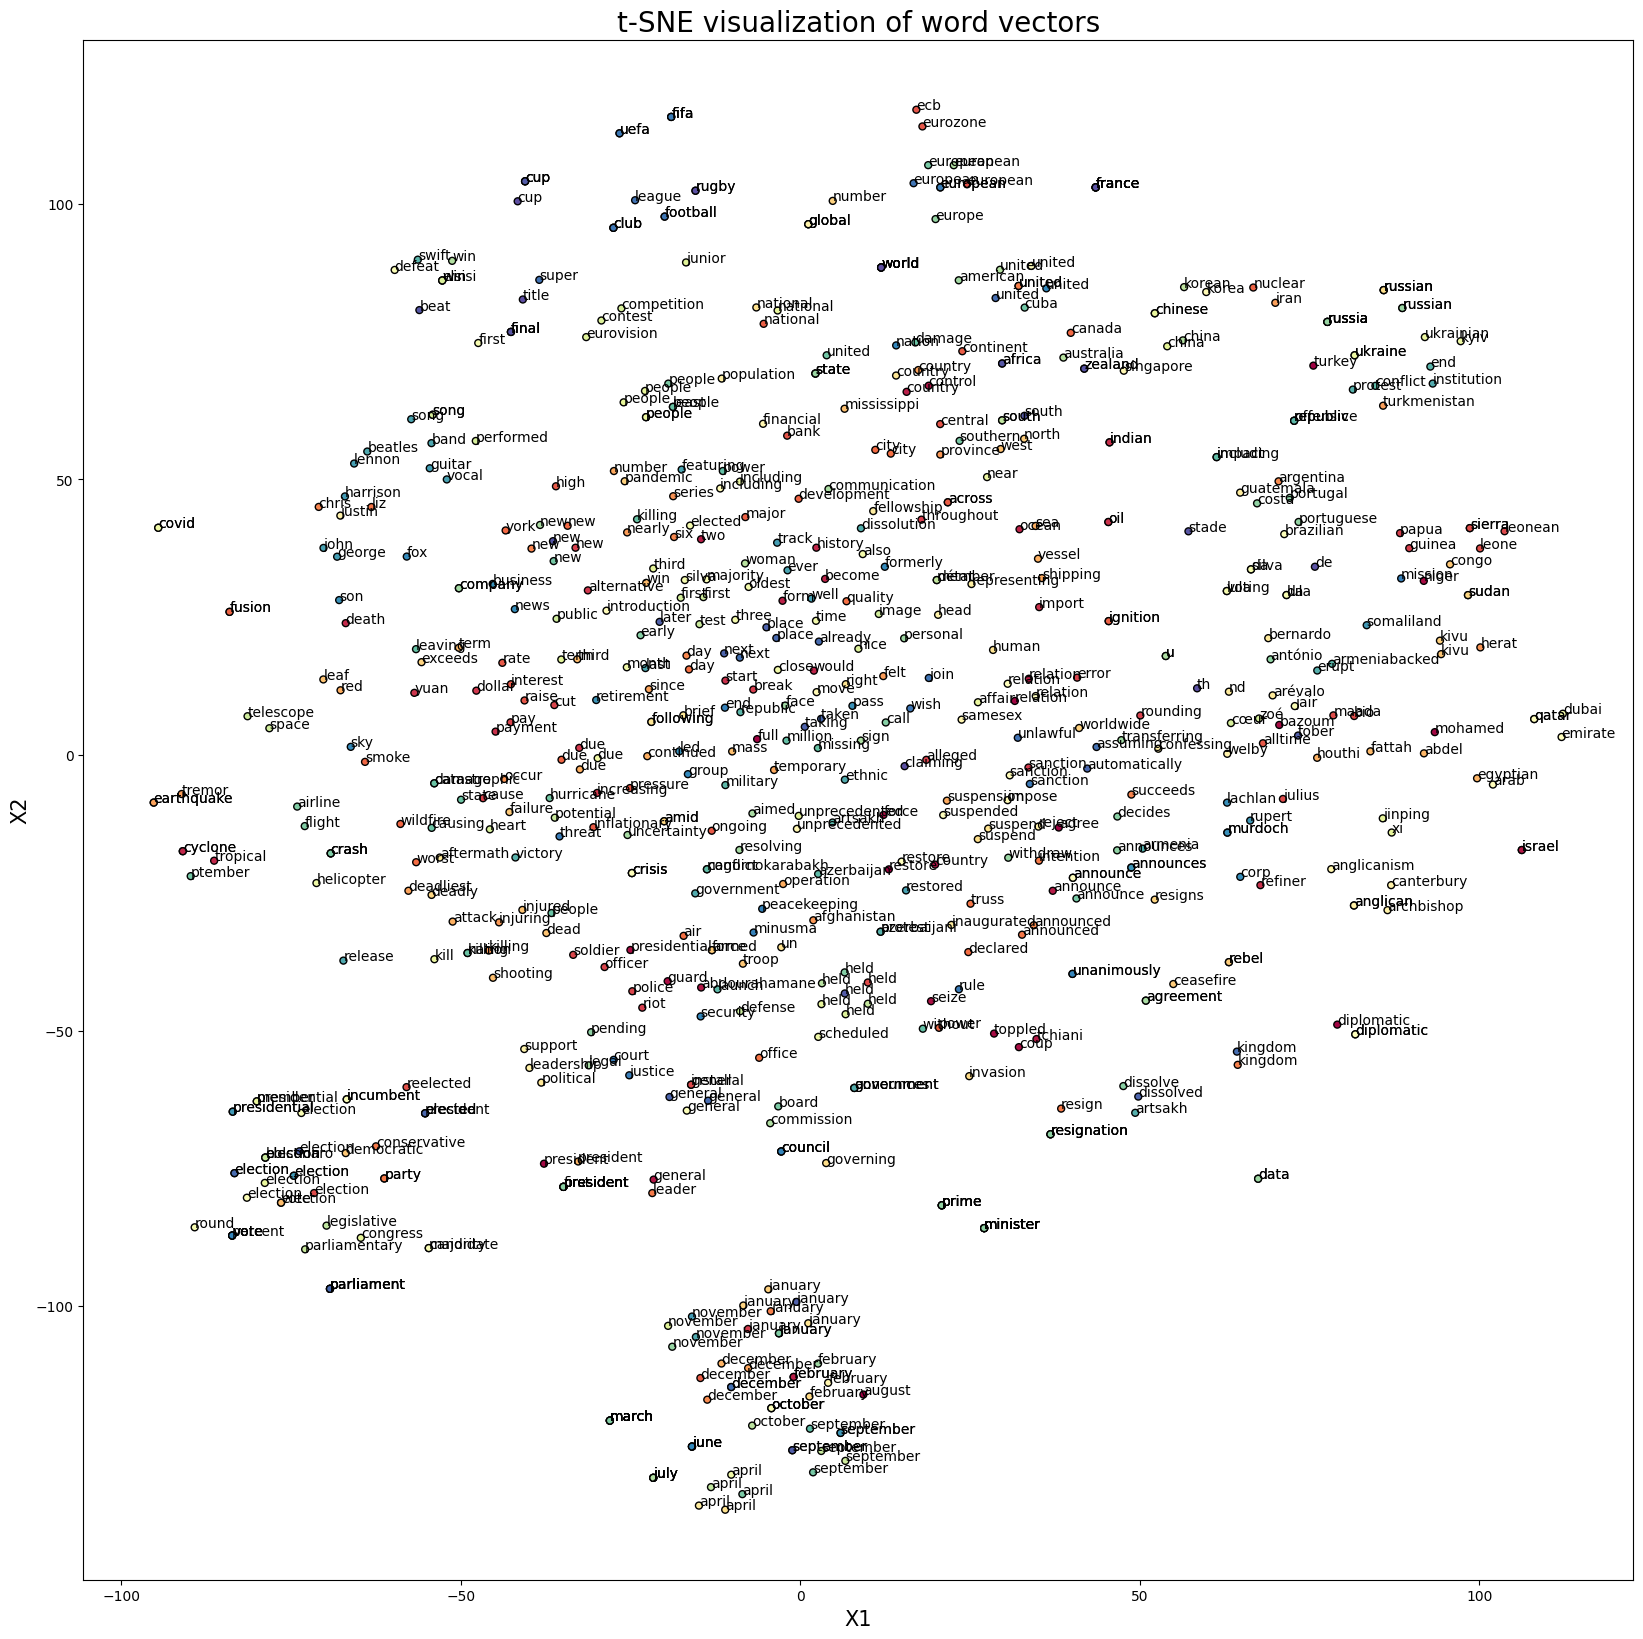

In [149]:
random_rows = df.sample(n=50)

random_words = []
random_vectors = []

# Iterate over the random rows
for _, row in random_rows.iterrows():
    for word, vector in zip(row["text"].split(), row["vectors"]):
        random_words.append(word)
        random_vectors.append(vector)

print(random_rows.shape)
print(len(random_words))
print(len(random_vectors))


# use t-SNE to reduce the dimension of the vectors to 2D
random_vectors = np.array(random_vectors)
random_tsne = TSNE(n_components=2, random_state=0)
random_vectors_2d = tsne.fit_transform(random_vectors)

print(random_vectors.shape)
print(random_vectors_2d.shape)


plt.figure(figsize=(20, 20))
cmap = plt.get_cmap("Spectral")
colors = cmap(np.linspace(0, 1, len(random_vectors_2d)))
plt.scatter(random_vectors_2d[:, 0], random_vectors_2d[:, 1], edgecolors='k', c=colors, alpha=1, marker='.', s=100)

for word, (x, y) in zip(random_words, random_vectors_2d):
    plt.text(x, y, word, fontsize=10)

plt.title("t-SNE visualization of word vectors", fontsize=20)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X2", fontsize=15)

plt.show()


 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 31.82674898518335


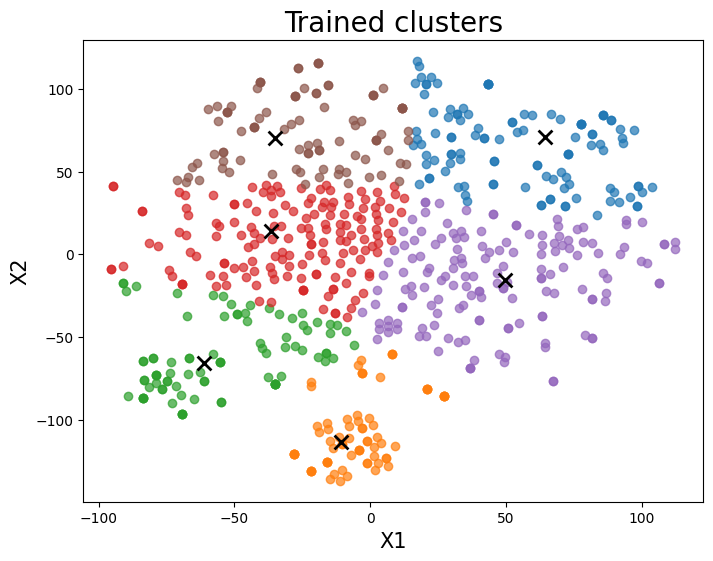

In [150]:
som_shape = (2, 3)
som = MiniSom(som_shape[0], som_shape[1], random_vectors_2d.shape[1], sigma=0.5, learning_rate=0.5,
            neighborhood_function='gaussian', random_seed=10)

som.train_batch(random_vectors_2d, 50000, verbose=True)

winner_coordinates = np.array([som.winner(x) for x in random_vectors_2d]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)


plt.figure(figsize=(8, 6))
for c in np.unique(cluster_index):
    plt.scatter(random_vectors_2d[cluster_index == c, 0],
                random_vectors_2d[cluster_index == c, 1], label='cluster='+str(c), alpha=0.7)
    plt.title("Trained clusters", fontsize=20)
    plt.xlabel("X1", fontsize=15)
    plt.ylabel("X2", fontsize=15)

for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=100, linewidths=2, color='k', label='centroid')

### 6. Search - convert question to vector

In [151]:
from nltk.tokenize import word_tokenize
sample_questions = [
                        "Who won the 2022 soccer world cup?",
                        "When did Sweden join NATO?",
                        "Who joined NATO in 2023?",
                        "Who joined NATO in 2024?",
                        "Which is the 31st member of NATO?",
                        "Which is the 32nd member of NATO?",
                        "Who won the Cricket World Cup in 2023?",
                        "Who defeated India in Cricket World Cup final in 2023?",
                        "Name the former prime minister of Japan that was assassinated in 2022?",
                        "When did Chandrayaan-3 land near the south pole of the Moon?",
                        "Where did Chandrayaan-3 land on the Moon?",
                        "Who acquired Twitter in 2022?",
                        "Who owns Twitter?",
                        "Who acquired Activision Blizzard in 2023?"
                   ]

#print(len(sample_questions))

# tokenized questions
tokenized_questions = [word_tokenize(i) for i in sample_questions]
# print(len(tokenized_questions))

for i in tokenized_questions:
    print(i)

['Who', 'won', 'the', '2022', 'soccer', 'world', 'cup', '?']
['When', 'did', 'Sweden', 'join', 'NATO', '?']
['Who', 'joined', 'NATO', 'in', '2023', '?']
['Who', 'joined', 'NATO', 'in', '2024', '?']
['Which', 'is', 'the', '31st', 'member', 'of', 'NATO', '?']
['Which', 'is', 'the', '32nd', 'member', 'of', 'NATO', '?']
['Who', 'won', 'the', 'Cricket', 'World', 'Cup', 'in', '2023', '?']
['Who', 'defeated', 'India', 'in', 'Cricket', 'World', 'Cup', 'final', 'in', '2023', '?']
['Name', 'the', 'former', 'prime', 'minister', 'of', 'Japan', 'that', 'was', 'assassinated', 'in', '2022', '?']
['When', 'did', 'Chandrayaan-3', 'land', 'near', 'the', 'south', 'pole', 'of', 'the', 'Moon', '?']
['Where', 'did', 'Chandrayaan-3', 'land', 'on', 'the', 'Moon', '?']
['Who', 'acquired', 'Twitter', 'in', '2022', '?']
['Who', 'owns', 'Twitter', '?']
['Who', 'acquired', 'Activision', 'Blizzard', 'in', '2023', '?']


In [152]:
sample_questions_vector = np.array([])

for i in sample_questions:
    sample_questions_vector = np.append(sample_questions_vector, convert_to_vector(i))


print(sample_questions_vector.shape)

(5400,)


In [153]:
a = "Who won the 2022 soccer world cup?"




b = np.array([])

b = np.append(b, convert_to_vector(a))

print(b.shape)
print(b)



(500,)
[ 7.62220025e-01  4.24400002e-01  5.21420002e-01 -1.73329994e-01
  8.82669985e-01 -3.47310007e-01  5.69769979e-01  5.68310022e-01
 -1.15660000e+00 -1.11199997e-01  6.50449991e-01 -3.26999992e-01
 -5.94860017e-01 -1.15249999e-01 -6.19170010e-01 -2.63060004e-01
  9.96590033e-02  1.98159993e-01 -2.98839994e-02  5.10160029e-01
  1.06970000e+00  4.34450001e-01  7.33569980e-01  4.98800009e-01
  7.16499984e-01 -6.89689994e-01 -1.78619996e-01 -8.24570000e-01
  1.21229994e+00 -1.00119996e+00 -1.08050004e-01  7.97839999e-01
 -7.44439987e-03  3.10130000e-01  5.20860016e-01 -3.39060009e-01
 -2.44489998e-01  1.42569995e+00 -1.30480003e+00  6.42679989e-01
 -6.42990023e-02 -5.27849972e-01  2.46270001e-01 -7.12549984e-01
  1.57769993e-01 -3.72839987e-01  7.66340017e-01 -8.39439988e-01
  3.89030010e-01 -7.23860025e-01 -1.02509999e+00 -3.91539991e-01
  7.73339987e-01  1.04869998e+00  7.77340010e-02 -2.31489992e+00
  2.23710001e-01  6.09790027e-01  4.52280015e-01  2.89709985e-01
 -1.92900002e-01  

In [154]:
b = b.reshape(-1, 2)
print(b.shape)
print(b)

(250, 2)
[[ 7.62220025e-01  4.24400002e-01]
 [ 5.21420002e-01 -1.73329994e-01]
 [ 8.82669985e-01 -3.47310007e-01]
 [ 5.69769979e-01  5.68310022e-01]
 [-1.15660000e+00 -1.11199997e-01]
 [ 6.50449991e-01 -3.26999992e-01]
 [-5.94860017e-01 -1.15249999e-01]
 [-6.19170010e-01 -2.63060004e-01]
 [ 9.96590033e-02  1.98159993e-01]
 [-2.98839994e-02  5.10160029e-01]
 [ 1.06970000e+00  4.34450001e-01]
 [ 7.33569980e-01  4.98800009e-01]
 [ 7.16499984e-01 -6.89689994e-01]
 [-1.78619996e-01 -8.24570000e-01]
 [ 1.21229994e+00 -1.00119996e+00]
 [-1.08050004e-01  7.97839999e-01]
 [-7.44439987e-03  3.10130000e-01]
 [ 5.20860016e-01 -3.39060009e-01]
 [-2.44489998e-01  1.42569995e+00]
 [-1.30480003e+00  6.42679989e-01]
 [-6.42990023e-02 -5.27849972e-01]
 [ 2.46270001e-01 -7.12549984e-01]
 [ 1.57769993e-01 -3.72839987e-01]
 [ 7.66340017e-01 -8.39439988e-01]
 [ 3.89030010e-01 -7.23860025e-01]
 [-1.02509999e+00 -3.91539991e-01]
 [ 7.73339987e-01  1.04869998e+00]
 [ 7.77340010e-02 -2.31489992e+00]
 [ 2.237100

In [155]:
c = convert_to_vector(a)

print(len(c))
print(c[-1][-1])

5
0.43917


In [158]:
# Load the Word2Vec model
glove_model_question = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Create a DataFrame with sample questions
df_question = pd.DataFrame({"text": sample_questions})

# Apply the convert_to_vector function to each question
df_question["vectors"] = df_question["text"].apply(convert_to_vector)

# Save the DataFrame to a CSV file
df_question.to_csv("sample_questions_vector.csv", index=False)

# Print the vectors for each question
print(df_question["vectors"])

0     [[0.76222, 0.4244, 0.52142, -0.17333, 0.88267,...
1     [[0.30449, -0.19628, 0.20225, -0.61687, -0.684...
2     [[-0.12698, -0.093075, -0.9536, -0.55698, 0.51...
3     [[-0.12698, -0.093075, -0.9536, -0.55698, 0.51...
4     [[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...
5     [[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...
6     [[0.76222, 0.4244, 0.52142, -0.17333, 0.88267,...
7     [[-0.55123, -0.071932, 0.64235, -0.40988, 0.35...
8     [[-0.038194, -0.24487, 0.72812, -0.39961, 0.08...
9     [[0.30449, -0.19628, 0.20225, -0.61687, -0.684...
10    [[0.30449, -0.19628, 0.20225, -0.61687, -0.684...
11    [[0.91016, -0.32978, -0.1976, 0.26211, 0.52823...
12    [[0.50264, -0.066676, 0.066302, -0.0039705, 0....
13    [[0.91016, -0.32978, -0.1976, 0.26211, 0.52823...
Name: vectors, dtype: object


In [159]:
sample_questions_vectors = df_question.values
print(sample_questions_vectors.shape)

(14, 2)


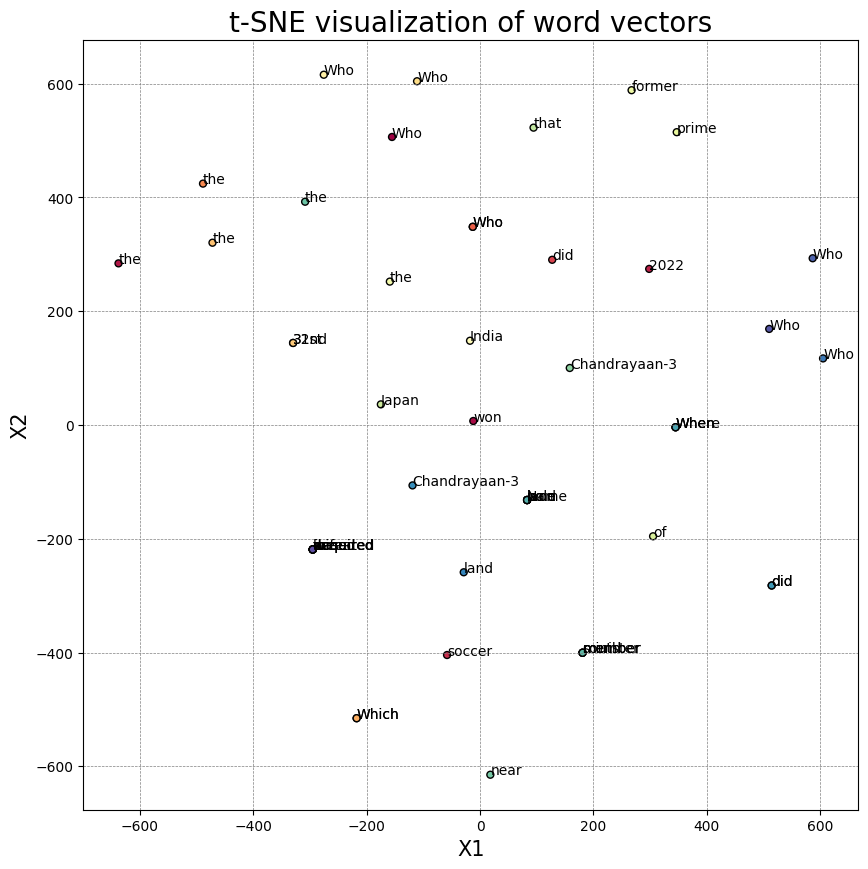

In [160]:
# extract the word vectors and their corresponding words
words_question = []
vectors_question = []
for _, row in df_question.iterrows():
    for word, vector in zip(row["text"].split(), row["vectors"]):
        words_question.append(word)
        vectors_question.append(vector)

# use t-SNE to reduce the dimension of the vectors to 2D
vectors_question = np.array(vectors_question)
tsne_question = TSNE(n_components=2, random_state=0)
vectors_2d_question = tsne.fit_transform(vectors_question)

# vrctors_2d = vectors.reshape(-1, 2)

plt.figure(figsize=(10, 10))
cmap = plt.get_cmap("Spectral")
colors = cmap(np.linspace(0, 1, len(vectors_2d_question)))
plt.scatter(vectors_2d_question[:, 0], vectors_2d_question[:, 1], edgecolors='k', c=colors, alpha=1, marker='.', s=100)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

for word, (x, y) in zip(words_question, vectors_2d_question):
    plt.text(x, y, word, fontsize=10)

plt.title("t-SNE visualization of word vectors", fontsize=20)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X2", fontsize=15)

plt.show()

In [185]:
import random

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)





cuda


(473, 2)

In [187]:
# Create model
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device=device)

In [208]:
import torch
from sklearn.metrics.pairwise import cosine_similarity

def dot_product(vector1, vector2):
    return np.dot(vector1, vector2)

def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)

    # Get Euclidean/L2 norm
    norm_vector1 = np.sqrt(np.sum(vector1**2))
    norm_vector2 = np.sqrt(np.sum(vector2**2))

    return dot_product / (norm_vector1 * norm_vector2)




# Example vectors/tensors
vector1 = np.array([1, 2, 3])
vector2 = np.array([1, 2, 3])
vector3 = np.array([4, 5, 6])
vector4 = np.array([-1, -2, -3])

# Calculate dot product
print("Dot product between vector1 and vector2:", dot_product(vector1, vector2))
print("Dot product between vector1 and vector3:", dot_product(vector1, vector3))
print("Dot product between vector1 and vector4:", dot_product(vector1, vector4))

# Cosine similarity
print("Cosine similarity between vector1 and vector2:", cosine_similarity(vector1, vector2))
print("Cosine similarity between vector1 and vector3:", cosine_similarity(vector1, vector3))
print("Cosine similarity between vector1 and vector4:", cosine_similarity(vector1, vector4))
print('-'*50)

print(cosine_similarity(vector1, vector2))

Dot product between vector1 and vector2: 14
Dot product between vector1 and vector3: 32
Dot product between vector1 and vector4: -14
Cosine similarity between vector1 and vector2: 1.0
Cosine similarity between vector1 and vector3: 0.9746318461970762
Cosine similarity between vector1 and vector4: -1.0
--------------------------------------------------
1.0


In [201]:
vectors.shape

(327600, 2)

In [209]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
 
 
twitter = """
Twitter is an online social media and social networking service owned and operated by American company X Corp.,
the legal successor of Twitter, Inc. Twitter users outside the United States are legally served by the Ireland-based
Twitter International Unlimited Company, which makes these users subject to Irish and European Union data protection laws.
On Twitter users post texts, photos and videos known as 'tweets'. Registered users can tweet, like, 'retweet' tweets,
and direct message (DM) other registered users, while unregistered users only have the ability to view public tweets.
Users interact with Twitter through browser or mobile frontend software, or programmatically via its APIs.
"""
facebook = """
Facebook is an online social media and social networking service owned by American technology giant Meta Platforms.
Created in 2004 by Mark Zuckerberg with fellow Harvard College students and roommates Eduardo Saverin, Andrew McCollum,
Dustin Moskovitz, and Chris Hughes, its name derives from the face book directories often given to American university students.
Membership was initially limited to only Harvard students, gradually expanding to other North American universities and,
since 2006, anyone over 13 years old. As of December 2022, Facebook claimed 2.96 billion monthly active users, and ranked third
worldwide among the most visited websites. It was the most downloaded mobile app of the 2010s. Facebook can be accessed from devices
with Internet connectivity, such as personal computers, tablets and smartphones. After registering, users can create a profile
revealing information about themselves. They can post text, photos and multimedia which are shared with any other users who have
agreed to be their friend' or, with different privacy settings, publicly. Users can also communicate directly with each other with
Messenger, join common-interest groups, and receive notifications on the activities of their Facebook friends and the pages they follow.
"""
tiktok = """
TikTok, and its Chinese counterpart Douyin (Chinese: 抖音; pinyin: Dǒuyīn), is a short-form video hosting service owned by ByteDance.
It hosts user-submitted videos, which can range in duration from 3 seconds to 10 minutes. Since their launches, TikTok and Douyin have
gained global popularity.[6][7] In October 2020, TikTok surpassed 2 billion mobile downloads worldwide. Morning Consult named TikTok the
third-fastest growing brand of 2020, after Zoom and Peacock. Cloudflare ranked TikTok the most popular website of 2021,
surpassing google.com.
"""
instagram = """
Instagram is a photo and video sharing social networking service owned by American company Meta Platforms. The app allows users to
upload media that can be edited with filters and organized by hashtags and geographical tagging. Posts can be shared publicly or
with preapproved followers. Users can browse other users' content by tag and location, view trending content, like photos, and follow
other users to add their content to a personal feed. Instagram was originally distinguished by allowing content to be framed only in a
square (1:1) aspect ratio of 640 pixels to match the display width of the iPhone at the time. In 2015, this restriction was eased with
an increase to 1080 pixels. It also added messaging features, the ability to include multiple images or videos in a single post, and a
Stories feature—similar to its main competitor Snapchat—which allowed users to post their content to a sequential feed, with each post
accessible to others for 24 hours. As of January 2019, Stories is used by 500 million people daily.
"""
 
 
 
 
documents = [twitter, facebook, tiktok, instagram]
count_vectorizer = CountVectorizer(stop_words="english")
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)
 
 
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(
   doc_term_matrix,
   columns=count_vectorizer.get_feature_names_out(),
   index=["twitter", "facebook", "tiktok", "instagram"],
)
print(df)
print(cosine_similarity(df, df))

           10  1080  13  2004  2006  2010s  2015  2019  2020  2021  2022  24  500  640  96  ability  about  accessed  accessible  active  activities  add  added  after  agreed  allowed  allowing  \
twitter     0     0   0     0     0      0     0     0     0     0     0   0    0    0   0        1      0         0           0       0           0    0      0      0       0        0         0   
facebook    0     0   1     1     1      1     0     0     0     0     1   0    0    0   1        0      1         1           0       1           1    0      0      1       1        0         0   
tiktok      1     0   0     0     0      0     0     0     2     1     0   0    0    0   0        0      0         0           0       0           0    0      0      1       0        0         0   
instagram   0     1   0     0     0      0     1     1     0     0     0   1    1    1   0        1      0         0           1       0           0    1      1      0       0        1         1   

         